# Absenteesim Project 

The database was created with records of absenteeism at work at a courier company in Brazil.

We need to predict if the people are excessively absent or moderate absent.

In [17]:
#Importing the libraries
import pandas as pd
import numpy as np

#Importing data visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Reading the csv file
df = pd.read_csv('Absenteeism_data.csv')

In [5]:
# Making a copy of the data
df_copy = df.copy()

In [6]:
#Viewing the data 
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [7]:
# Displaying the whole data
pd.options.display.max_columns = None
pd.options.display.max_rows = None

df

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


# Exploratory Data Analysis

## Feature description
<img src="features.png">

In [8]:
#Shape of the dataframe
df.shape

(700, 12)

In [9]:
#Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [10]:
#Statistical description about the data
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,17.951429,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,11.028144,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [11]:
#Checking missing values
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

### Correlation Matrix

<AxesSubplot:>

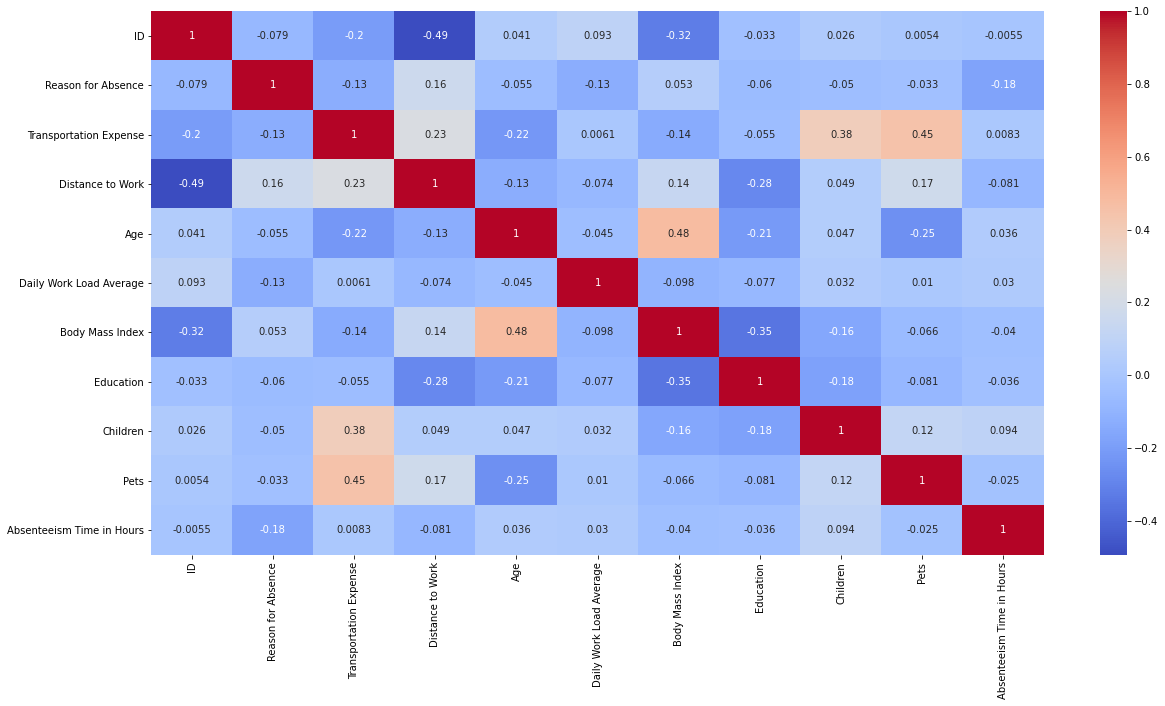

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

## Data Preprocessing

### 'ID' Column

In [376]:
# Drop 'Id' Column
df.drop(['ID'],axis=1,inplace=True)

In [377]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


### 'Reason for Absence' Column

In [378]:
df['Reason for Absence']

0      26
1       0
2      23
3       7
4      23
5      23
6      22
7      23
8      19
9      22
10      1
11      1
12     11
13     11
14     23
15     14
16     23
17     21
18     11
19     23
20     10
21     11
22     13
23     28
24     18
25     25
26     23
27     28
28     18
29     23
30     18
31     18
32     23
33     18
34     23
35     23
36     24
37     11
38     28
39     23
40     23
41     23
42     23
43     19
44     23
45     23
46     23
47     23
48     22
49     14
50      0
51      0
52     23
53     23
54      0
55      0
56     18
57     23
58      0
59     23
60     23
61     23
62     23
63     23
64      0
65     23
66     23
67     23
68     23
69     23
70     23
71     23
72     23
73     23
74     19
75     14
76     28
77     26
78     23
79     28
80     23
81     23
82     13
83     21
84     23
85     10
86     22
87     14
88     23
89      6
90     23
91     21
92     13
93     28
94     28
95     28
96      7
97     23
98     23
99     19


In [379]:
#Unique values in 'Reason for Absence'
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [380]:
#Total no. of unique values
len(df['Reason for Absence'].unique())

28

In [381]:
#Sorting the unique values
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

## Creating groups from features

* Group 1 -- Reasons belonging to various diseases
* Group 2 -- Reason belonging to Pregnancy
* Group 3 -- Reasons belonging to Poisoning or signs not elsewhere recognized
* Group 4 -- Light reasons for absence

<img src="groups.png">

In [382]:
#Creating dummies (One hot Encoding)
reason_columns = pd.get_dummies(df['Reason for Absence'],drop_first=True)

In [383]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [384]:
#Dropping the 'Reason for Absence' column
df.drop(['Reason for Absence'], axis=1, inplace=True)

In [385]:
#Categorising into different groups and finding out if reason is from group 1 or 2 or 3 or 4
reason_type_1 = reason_columns.loc[: , 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[: , 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[: , 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[: , 22:].max(axis=1)

In [386]:
reason_type_1

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     0
15     1
16     0
17     0
18     1
19     0
20     1
21     1
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     1
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     1
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     1
76     0
77     0
78     0
79     0
80     0
81     0
82     1
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     0
92     1
93     0
94     0
95     0
96     1
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

In [387]:
#Concatenate all the reason types with dataframe
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4] ,axis=1)

In [388]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [389]:
#Renaming the column names of the Reasons
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [390]:
new_column_names=['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason 1',  'Reason 2',  'Reason 3',  'Reason 4']

In [391]:
df.columns= new_column_names

In [392]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1,Reason 2,Reason 3,Reason 4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [393]:
#Reordering column names
column_names_reorder= ['Reason 1',  'Reason 2',  'Reason 3',  'Reason 4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [394]:
df = df[column_names_reorder]

In [395]:
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


### 'Date' Column

pd.to_datetime() converts values into timestamp

In [396]:
df['Date']

0      07/07/2015
1      14/07/2015
2      15/07/2015
3      16/07/2015
4      23/07/2015
5      10/07/2015
6      17/07/2015
7      24/07/2015
8      06/07/2015
9      13/07/2015
10     20/07/2015
11     14/07/2015
12     15/07/2015
13     15/07/2015
14     15/07/2015
15     17/07/2015
16     17/07/2015
17     27/07/2015
18     30/07/2015
19     05/08/2015
20     12/08/2015
21     03/08/2015
22     10/08/2015
23     14/08/2015
24     17/08/2015
25     24/08/2015
26     04/08/2015
27     12/08/2015
28     19/08/2015
29     28/08/2015
30     17/08/2015
31     27/08/2015
32     27/08/2015
33     17/08/2015
34     17/08/2015
35     17/08/2015
36     04/08/2015
37     20/08/2015
38     21/08/2015
39     28/08/2015
40     01/09/2015
41     07/09/2015
42     01/09/2015
43     08/09/2015
44     09/09/2015
45     13/09/2015
46     14/09/2015
47     24/09/2015
48     04/09/2015
49     14/09/2015
50     21/09/2015
51     28/09/2015
52     08/09/2015
53     15/09/2015
54     22/09/2015
55     29/

In [397]:
df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

In [398]:
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
5     2015-07-10
6     2015-07-17
7     2015-07-24
8     2015-07-06
9     2015-07-13
10    2015-07-20
11    2015-07-14
12    2015-07-15
13    2015-07-15
14    2015-07-15
15    2015-07-17
16    2015-07-17
17    2015-07-27
18    2015-07-30
19    2015-08-05
20    2015-08-12
21    2015-08-03
22    2015-08-10
23    2015-08-14
24    2015-08-17
25    2015-08-24
26    2015-08-04
27    2015-08-12
28    2015-08-19
29    2015-08-28
30    2015-08-17
31    2015-08-27
32    2015-08-27
33    2015-08-17
34    2015-08-17
35    2015-08-17
36    2015-08-04
37    2015-08-20
38    2015-08-21
39    2015-08-28
40    2015-09-01
41    2015-09-07
42    2015-09-01
43    2015-09-08
44    2015-09-09
45    2015-09-13
46    2015-09-14
47    2015-09-24
48    2015-09-04
49    2015-09-14
50    2015-09-21
51    2015-09-28
52    2015-09-08
53    2015-09-15
54    2015-09-22
55    2015-09-29
56    2015-09-16
57    2015-09-23
58    2015-09-

In [399]:
type(df['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [400]:
#Extracting the month value
df['Date'][0].month

7

In [401]:
list_months=[]

for i in range(700):
    list_months.append(df['Date'][i].month)

In [402]:
list_months

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

In [403]:
len(list_months)

700

In [404]:
df['Month Value'] = list_months

In [405]:
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [406]:
#Extract the day of the week
df['Date'][0].weekday()

#Week starts from Monday with 0 and ends with Sunday as 6

1

In [407]:
#It means that 7th day of July was Monday
df['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [408]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [409]:
df['Day of Week'] = df['Date'].apply(date_to_weekday)

In [410]:
#Dropping the Date column
df.drop(['Date'],axis=1, inplace=True)

In [411]:
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3


### 'Education' Column

In [412]:
df['Education'].head()

0    1
1    1
2    1
3    1
4    1
Name: Education, dtype: int64

In [413]:
#Unique values in Education Column
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

**Education 1 / 2 / 3 / 4 Description**

* 1 -- High School
* 2 -- Graduate
* 3 -- Postgraduate
* 4 -- Master or Doctor

In [414]:
df['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [415]:
#We can see here that 1st category is more than the 2,3,4th caategory 
#So for better understanding of the education column, we will categorise into 2 categories :- 0 for high school, 1 for all left out

df['Education'] = df['Education'].map({1:0 , 2:1 , 3:1 , 4:1 })

In [416]:
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

In [417]:
#Reordering the columns
df.columns.values

array(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of Week'], dtype=object)

In [418]:
column_names_reorder = ['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Month Value',
       'Day of Week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [419]:
df = df[column_names_reorder]

In [420]:
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


# Model Building

We will create two classes to predict
* Moderately absent
* Excessively absent


### Create Targets

We will take the median value of the 'Absenteeism Time in Hours' and use it as a cut-off line<br>
Anything below median will be considered normal and everything above would be excessive

In [421]:
#Median
df['Absenteeism Time in Hours'].median()

3.0

Therefore, moderately absent (less than or equal to 3) and excessively absent (more than 3 hours)

If the person is moderately absent, values will be assigned 0 while if a person is excessively absent value will be assigned 1

In [422]:
#np.where works same like if-else condition
targets = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median() , 1 , 0)

In [423]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [424]:
df['Excessive Absenteeism'] = targets

In [425]:
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [426]:
#Data is balanced
targets.sum() / targets.shape[0]

#Around 46 percent are 1's and 54 percent are 0's

0.45571428571428574

In [427]:
# Dropping 'Absenteeism Time in Hours' column
df.drop(['Absenteeism Time in Hours'], axis=1, inplace=True)

In [428]:
df.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


In [429]:
# Inputs and target variable
X = df.drop('Excessive Absenteeism',axis=1)
y= df['Excessive Absenteeism']

In [430]:
#Input variables
X.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1


In [431]:
#Target variable
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Excessive Absenteeism, dtype: int32

### Standardize the input

In [432]:
X_columns_to_scale = X.drop(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Education'],axis=1)

In [434]:
X_columns_to_scale.columns.values

array(['Month Value', 'Day of Week', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Children', 'Pets'], dtype=object)

In [435]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()

X_scaler.fit(X_columns_to_scale)

X_scaled = X_scaler.transform(X_columns_to_scale)

In [437]:
X_scaled

array([[ 0.18272635, -0.68370352,  1.00584437, ...,  0.76743118,
         0.88046927,  0.26848661],
       [ 0.18272635, -0.68370352, -1.57468098, ...,  1.00263338,
        -0.01928035, -0.58968976],
       [ 0.18272635, -0.00772546, -0.6541427 , ...,  1.00263338,
        -0.91902997, -0.58968976],
       ...,
       [-0.3882935 ,  0.66825259,  1.62456682, ..., -0.40857982,
        -0.91902997, -0.58968976],
       [-0.3882935 ,  0.66825259,  0.19094163, ..., -0.40857982,
        -0.91902997, -0.58968976],
       [-0.3882935 ,  0.66825259,  1.03602595, ..., -0.40857982,
        -0.01928035,  0.26848661]])

In [438]:
X[X_columns_to_scale.columns.values] = X_scaled

In [440]:
#Scaled Input dataframe
X.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Month Value,Day of Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,-0.683704,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-0.683704,-1.574681,-1.141882,2.130803,-0.806331,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.007725,-0.654143,1.426749,0.248310,-0.806331,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.668253,0.854936,-1.682647,0.405184,-0.806331,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,0.668253,1.005844,0.412816,-0.536062,-0.806331,0.767431,0,0.880469,0.268487


### Split the data into train and test 

In [441]:
from sklearn.model_selection import train_test_split

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

###  ** Logistic Regression **

In [453]:
from sklearn.linear_model import LogisticRegression

In [454]:
from sklearn.metrics import confusion_matrix

### Training the Model

In [455]:
model = LogisticRegression()

In [456]:
model.fit(X_train,y_train)

LogisticRegression()

In [457]:
#Training score
model.score(X_train,y_train)

0.775

### Finding the Bias / Intercept and Coefficients / Weights


In [458]:
model.intercept_

array([-1.6561092])

In [459]:
model.coef_

array([[ 2.80096498e+00,  9.34857518e-01,  3.09561645e+00,
         8.56587468e-01,  1.66248119e-01, -8.43703301e-02,
         6.12732578e-01, -7.79685996e-03, -1.65922708e-01,
        -1.47005122e-04,  2.71811477e-01, -2.05738037e-01,
         3.61989880e-01, -2.85510745e-01]])

In [460]:
X.columns.values

array(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Month Value',
       'Day of Week', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [461]:
#Summary table
summary_table = pd.DataFrame(columns=['Feature Names'], data = X.columns.values)

summary_table['Coefficient'] = np.transpose(model.coef_)

summary_table

,Feature Names,Coefficient
0,Reason 1,2.800965
1,Reason 2,0.934858
2,Reason 3,3.095616
3,Reason 4,0.856587
4,Month Value,0.166248
5,Day of Week,-0.084370
6,Transportation Expense,0.612733
7,Distance to Work,-0.007797
8,Age,-0.165923
9,Daily Work Load Average,-0.000147


In [462]:
#Sorting the dataframe via Coefficients
summary_table.sort_values('Coefficient',ascending=False)

#Most important to Least Important

,Feature Names,Coefficient
2,Reason 3,3.095616
0,Reason 1,2.800965
1,Reason 2,0.934858
3,Reason 4,0.856587
6,Transportation Expense,0.612733
12,Children,0.361990
10,Body Mass Index,0.271811
4,Month Value,0.166248
9,Daily Work Load Average,-0.000147
7,Distance to Work,-0.007797


### Testing the Model

In [463]:
#Test accuracy
model.score(X_test,y_test)

0.7428571428571429

### Making Predictions

In [465]:
y_pred=model.predict(X_test)

### Confusion Matrix

In [466]:
confusion_matrix(y_test,y_pred)

array([[58, 16],
       [20, 46]], dtype=int64)

### Saving the Model

Pickle module is a python module used to convert a Python object into a character stream

In [467]:
import pickle

In [468]:
#Model name, write bytes
with open('model','wb') as file:
    pickle.dump(model,file)

In [469]:
#Saving a scaler
with open('scaler','wb') as file:
    pickle.dump(X_scaler,file)